### Data Analyst & Handling Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import re

In [2]:
# SHAPE OF DATA

df_movie = pd.read_csv('../crawl_data/Movie_Phimmoi.csv')
df_movie.shape

(9505, 12)

In [3]:
# VIEW HEAD OF DATA
df_movie.head()

,url_film,title,describe,rating,rate_count,status,release_year,country,genre,director,actor,img_film
0,https://phimmoichill.blog/info/newtopia-pm16433,Newtopia,[' Newtopia Tân Thế Giới 2025 xoay quanh về ...,7,208.0,1,2025,Phim Hàn Quốc,Phim Hành Động,Yoon Sung Hyun,"['Park Jeong Min', 'Kim Ji Soo', 'Im Sung Jae'...",https://img.phimmoichill.blog/images/film/newt...
1,https://phimmoichill.blog/info/ho-den-tu-than-...,Hố Đen Tử Thần,[' Hố Đen Tử Thần Interstellar 2014 Interstell...,8,95.0,1,2014,Phim Âu Mỹ,Phim Hành Động,Christopher Nolan,"['Jessica Chastain', 'Matthew McConaughey', 'A...",https://img.phimmoichill.blog/images/film/ho-d...
2,https://phimmoichill.blog/info/trai-tim-bi-cho...,Trái Tim Bị Chôn Vùi,[' Trái Tim Bị Chôn Vùi Buried Hearts 2025 Câu...,9,35.0,1,2025,Phim Hàn Quốc,Phim Hành Động,Jin Chang Gyu,"['Park Hyung Sik', 'Hong Hwa Yeon', 'Huh Joon ...",https://img.phimmoichill.blog/images/film/trai...
3,https://phimmoichill.blog/info/yeu-la-dau-pm16412,Yêu Là Đau,[' Yêu Là Đau Love Hurts 2025 Marvin Gable (do...,5,14.0,1,2025,Phim Âu Mỹ,Phim Hành Động,Jonathan Eusebio,"['Quan Kế Huy', 'Ariana DeBose', 'Ngô Ngạn Tổ'...",https://img.phimmoichill.blog/images/film/yeu-...
4,https://phimmoichill.blog/info/ngo-phan-pm16458,Ngộ Phán,[' Ngộ Phán The Prosecutor 2024 Câu chuyện xoa...,7,127.0,1,2024,Phim Hồng Kông,Phim Hành Động,Chân Tử Đan,"['Chân Tử Đan', 'Trương Trí Lâm', 'Huệ Anh Hồng']",https://img.phimmoichill.blog/images/film/ngo-...


In [4]:
# Handling Film Has Status = 0 (Not Release)
df_movie['status'].value_counts()
df_movie = df_movie[df_movie['status'] == 1]
df_movie.head()

,url_film,title,describe,rating,rate_count,status,release_year,country,genre,director,actor,img_film
0,https://phimmoichill.blog/info/newtopia-pm16433,Newtopia,[' Newtopia Tân Thế Giới 2025 xoay quanh về ...,7,208.0,1,2025,Phim Hàn Quốc,Phim Hành Động,Yoon Sung Hyun,"['Park Jeong Min', 'Kim Ji Soo', 'Im Sung Jae'...",https://img.phimmoichill.blog/images/film/newt...
1,https://phimmoichill.blog/info/ho-den-tu-than-...,Hố Đen Tử Thần,[' Hố Đen Tử Thần Interstellar 2014 Interstell...,8,95.0,1,2014,Phim Âu Mỹ,Phim Hành Động,Christopher Nolan,"['Jessica Chastain', 'Matthew McConaughey', 'A...",https://img.phimmoichill.blog/images/film/ho-d...
2,https://phimmoichill.blog/info/trai-tim-bi-cho...,Trái Tim Bị Chôn Vùi,[' Trái Tim Bị Chôn Vùi Buried Hearts 2025 Câu...,9,35.0,1,2025,Phim Hàn Quốc,Phim Hành Động,Jin Chang Gyu,"['Park Hyung Sik', 'Hong Hwa Yeon', 'Huh Joon ...",https://img.phimmoichill.blog/images/film/trai...
3,https://phimmoichill.blog/info/yeu-la-dau-pm16412,Yêu Là Đau,[' Yêu Là Đau Love Hurts 2025 Marvin Gable (do...,5,14.0,1,2025,Phim Âu Mỹ,Phim Hành Động,Jonathan Eusebio,"['Quan Kế Huy', 'Ariana DeBose', 'Ngô Ngạn Tổ'...",https://img.phimmoichill.blog/images/film/yeu-...
4,https://phimmoichill.blog/info/ngo-phan-pm16458,Ngộ Phán,[' Ngộ Phán The Prosecutor 2024 Câu chuyện xoa...,7,127.0,1,2024,Phim Hồng Kông,Phim Hành Động,Chân Tử Đan,"['Chân Tử Đan', 'Trương Trí Lâm', 'Huệ Anh Hồng']",https://img.phimmoichill.blog/images/film/ngo-...


In [5]:
# review shape of data
df_movie.shape

(9502, 12)

In [6]:
# INFORMATION OF DATA

df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9502 entries, 0 to 9504
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url_film      9502 non-null   object 
 1   title         9502 non-null   object 
 2   describe      9502 non-null   object 
 3   rating        9502 non-null   object 
 4   rate_count    7392 non-null   float64
 5   status        9502 non-null   int64  
 6   release_year  9492 non-null   object 
 7   country       9502 non-null   object 
 8   genre         9502 non-null   object 
 9   director      9037 non-null   object 
 10  actor         9502 non-null   object 
 11  img_film      9502 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 965.0+ KB


In [7]:
df_movie.isnull().sum()

url_film           0
title              0
describe           0
rating             0
rate_count      2110
status             0
release_year      10
country            0
genre              0
director         465
actor              0
img_film           0
dtype: int64

In [8]:
# DUPLICATED DATA
df_movie.duplicated().sum()

0

In [9]:
# Handeling Missing Data
df_movie['rate_count'] = df_movie['rate_count'].fillna( np.floor(df_movie['rate_count'].mean()))
df_movie['director'] = df_movie['director'].fillna("Unknown")
df_movie['actor'] = df_movie['actor'].fillna("")
df_movie["release_year"] = pd.to_numeric(df_movie["release_year"], errors="coerce")
df_movie['release_year'] = df_movie['release_year'].fillna(df_movie['release_year'].median())


In [10]:
df_movie.shape

(9502, 12)

In [11]:
df_movie.isna().sum()

url_film        0
title           0
describe        0
rating          0
rate_count      0
status          0
release_year    0
country         0
genre           0
director        0
actor           0
img_film        0
dtype: int64

In [12]:
df_movie['rating'].unique()

array(['7', '8', '9', '5', '4', '6', '10', '3', '51,302', '197,699', '2',
       '35,297', '82,858', '74,035', '1', '59,700', '107,997', '160,071',
       '205,577', '145,221', '21,377'], dtype=object)

In [13]:
df_movie['rating'] = df_movie['rating'].astype(str).str.replace(',', '').astype(float)
df_movie['rating'] = df_movie['rating'].apply(lambda x: df_movie['rating'].median() if x > 10 else x)
df_movie['rating'].unique()

array([ 7.,  8.,  9.,  5.,  4.,  6., 10.,  3.,  2.,  1.])

In [14]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9502 entries, 0 to 9504
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url_film      9502 non-null   object 
 1   title         9502 non-null   object 
 2   describe      9502 non-null   object 
 3   rating        9502 non-null   float64
 4   rate_count    9502 non-null   float64
 5   status        9502 non-null   int64  
 6   release_year  9502 non-null   float64
 7   country       9502 non-null   object 
 8   genre         9502 non-null   object 
 9   director      9502 non-null   object 
 10  actor         9502 non-null   object 
 11  img_film      9502 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 965.0+ KB


In [15]:
print(df_movie['describe'])
print(df_movie['describe'][0])
print(df_movie['describe'][3000])


0       [' Newtopia Tân Thế Giới 2025 xoay quanh về ...
1       [' Hố Đen Tử Thần Interstellar 2014 Interstell...
2       [' Trái Tim Bị Chôn Vùi Buried Hearts 2025 Câu...
3       [' Yêu Là Đau Love Hurts 2025 Marvin Gable (do...
4       [' Ngộ Phán The Prosecutor 2024 Câu chuyện xoa...
                              ...                        
9500    [' ', ' Shoot Me in the Heart 2015 Rung Động T...
9501    [' ', ' The Longest Ride 2015 The Longest Ride...
9502    [' ', ' 2011 2011 "Biên giới của Hách Yên" do ...
9503    [' ', ' Runner Runner 2013 Aces, Runner Runner...
9504    [' ', ' The Gunman 2015 The Gunman (2015) The ...
Name: describe, Length: 9502, dtype: object
[' Newtopia Tân Thế Giới 2025 xoay quanh về cặp đôi Lee Jae-yoon (do Park Jeong-min thủ vai) và Kang Young-ju (do Jisoo thủ vai), những người vừa chia tay nhưng cố gắng tái hợp sau khi một đại dịch zombie bùng phát, lan rộng khắp Hàn Quốc.\xa0 ', ' ']
[' ', ' Pokemon Movie 13: Zoroark Master of Illusions 2010 Pokém

In [16]:
df_movie['describe'] = df_movie['describe'].apply(lambda x: re.sub(r'[^a-zA-ZÀ-ỹ0-9()\s]', '', x))
df_movie['describe'] = df_movie['describe'].str.strip()
df_movie['describe'] = df_movie['describe'].apply(lambda x: x[:-3] if x.endswith("xa0") else x)
df_movie['describe'][0]

'Newtopia Tân Thế Giới 2025 xoay quanh về cặp đôi Lee Jaeyoon (do Park Jeongmin thủ vai) và Kang Youngju (do Jisoo thủ vai) những người vừa chia tay nhưng cố gắng tái hợp sau khi một đại dịch zombie bùng phát lan rộng khắp Hàn Quốc'

In [17]:
df_movie['actor']

0       ['Park Jeong Min', 'Kim Ji Soo', 'Im Sung Jae'...
1       ['Jessica Chastain', 'Matthew McConaughey', 'A...
2       ['Park Hyung Sik', 'Hong Hwa Yeon', 'Huh Joon ...
3       ['Quan Kế Huy', 'Ariana DeBose', 'Ngô Ngạn Tổ'...
4       ['Chân Tử Đan', 'Trương Trí Lâm', 'Huệ Anh Hồng']
                              ...                        
9500    ['Lee Min Ki', 'Yeo Jin Goo', 'Kim Jung Tae', ...
9501    ['Scott Eastwood', 'Jack Huston', 'Britt Rober...
9502    ['Lương Gia Huy', 'Hà Nhuận Đông', 'Tống Giai'...
9503    ['Gemma Arterton', 'Justin Timberlake', 'Ben A...
9504        ['Idris Elba', 'Sean Penn', 'Jasmine Trinca']
Name: actor, Length: 9502, dtype: object

In [18]:
df_movie['actor'] = df_movie['actor'].apply(lambda x: re.sub(r'[^a-zA-ZÀ-ỹ,\s]', '', x))
print(df_movie['actor'][0])

Park Jeong Min, Kim Ji Soo, Im Sung Jae, Kim Joon Han


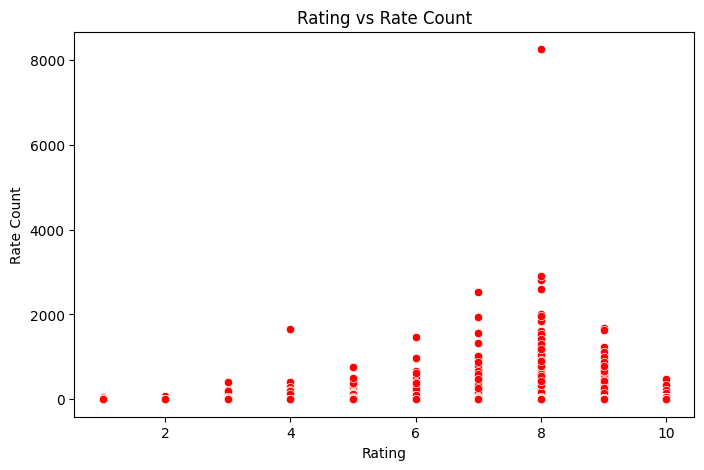

In [19]:
df_movie = df_movie[df_movie['rate_count'] < 11000]
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_movie, y='rate_count', x='rating', color='red')
plt.title("Rating vs Rate Count")
plt.ylabel("Rate Count")
plt.xlabel("Rating")
plt.show()

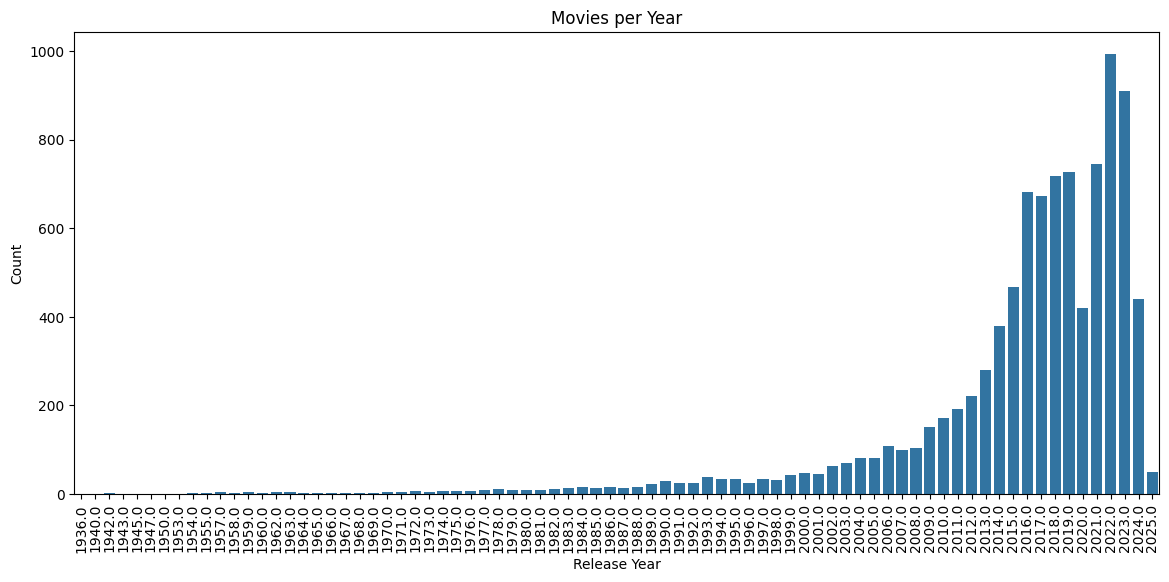

In [20]:
plt.figure(figsize=(14,6))
sns.countplot(x='release_year', data=df_movie, 
              order=sorted(df_movie['release_year'].unique()))
plt.title("Movies per Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

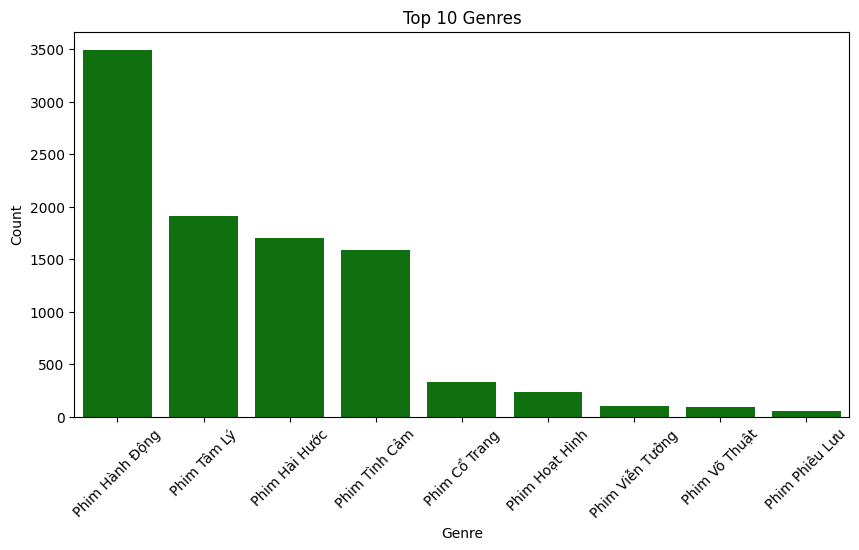

In [21]:
genres_series = df_movie['genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
all_genres = [genre for sublist in genres_series for genre in sublist]
genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(10)
top_genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

plt.figure(figsize=(10,5))
sns.barplot(x='Genre', y='Count', data=top_genres_df, color='green')
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [22]:
df_movie.to_csv('../data/data-film-final.csv', index=False)